1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import interpolate 
from scipy import optimize

%matplotlib inline

Maximum wind speed occuring every fifty years: 32.97989844019469


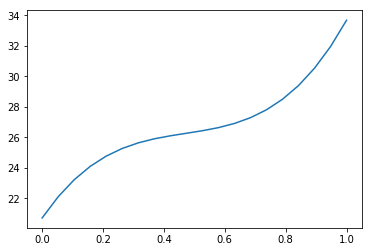

In [2]:
# Load data
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

# Compute comulative distribution
cprob = np.array([i/(years_nb+1) for i in range(1,years_nb+1)])

# Order wind speed
sorted_speeds = np.sort(max_speeds)

# Interpolate data
quantile_func = sp.interpolate.UnivariateSpline(cprob, sorted_speeds)
x_lin = np.linspace(0,1, 20)

# Plot quantile function
plt.plot(x_lin, quantile_func(x_lin))

fifty_prob = 1. - 0.02
fifty_wind = quantile_func(fifty_prob)
print('Maximum wind speed occuring every fifty years:',fifty_wind)

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

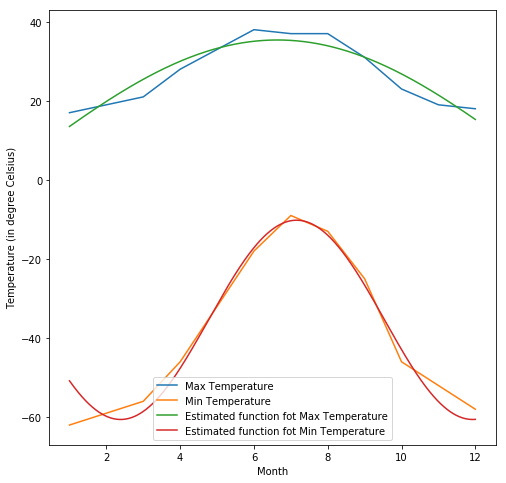

In [3]:
# Create array of data
month = np.arange(1,13)
max_temp = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Plot temperatures extrems
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
ax.plot(month, max_temp, label = "Max Temperature")
ax.plot(month, min_temp, label = "Min Temperature")
ax.set_xlabel("Month")
ax.set_ylabel("Temperature (in degree Celsius)")

# Function to describe the temperatures
def func_temp(x, A, B, C):
    return C + A * np.sin(B * x)

# fit the previous function into the previous one
max_params, max_params_covariance = optimize.curve_fit(func_temp, month, max_temp, p0=[10, 1/2, np.mean(max_temp)])
min_params, min_params_covariance = optimize.curve_fit(func_temp, month, min_temp, p0=[25, 1/2, np.mean(min_temp)])

# Plot the results
lin = np.linspace(1,12, num=10000)
ax.plot(lin, func_temp(lin, max_params[0], max_params[1], max_params[2]), label = "Estimated function fot Max Temperature")
ax.plot(lin, func_temp(lin, min_params[0], min_params[1], min_params[2]), label = "Estimated function fot Min Temperature")

ax.legend()

plt.show()

### Answer
*Is the fit reasonable? If not, why?*

If we plot the estimated function in each month, the fit seems resonable, but with a more accurate plot of the estimated function (see graphs) we can see that this function is not what we can expect. In the first case the perid of the estimated function is much higher than 12 (we expect that this behaviour repeats periodically each year). In the second case the estimted function is more resonable than the fisrt one. 
Finally I notice that changing the initial values of the estimation brought me to a more accurate estimation of temperature's behaviour.

*Is the time offset for min and max temperatures the same within the fit accuracy?* 

In this case the offset is the same (I intended that the time offset is the time gap between each sample)

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


-1.0316284534865354
0.0


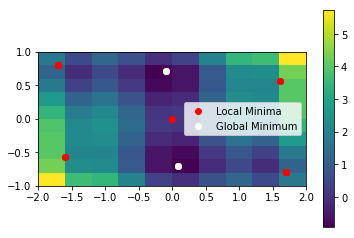

In [149]:
# Define the function
def func(x):
    return (4-2.1*x[0]**2+x[0]**4/3)*x[0]**2+x[0]*x[1]+(4*x[1]**2-4)*x[1]**2

# Create the meshgrid and show it
N = 10
bnds = ((-2, +2), (-1, +1)) # Bounds for x and y
x = np.linspace(bnds[0][1],bnds[0][0], num=N)
y = np.linspace(bnds[1][0],bnds[1][1], num=N)
xv, yv = np.meshgrid(x, y)
values = func([xv, yv])

# Show vales of each interval rescaled inside 0-1
plt.imshow(values, extent=[bnds[0][0],bnds[0][1],bnds[1][0],bnds[1][1]])
plt.colorbar()

# Flatten data
xv = xv.flatten()
yv = yv.flatten()

# Search minimum starting from different points
local_minima = np.array([optimize.minimize(func, x0=[x,y], method='SLSQP', bounds = bnds) for (x,y) in zip(xv, yv)])
points_local_minima = np.array([el.x for el in local_minima]) # Coordinates of the local minimum
func_local_minima = np.array([el.fun for el in local_minima]) # Value of the function in the local minimum
xx = points_local_minima[:,0] # Coord x of minima
yy = points_local_minima[:,1] # Coord x of minima

# Find minimum
global_min = func_local_minima.min()

# Admit a certain error 
mask1 = func_local_minima <= global_min+10**(-10)
mask2 = func_local_minima >= global_min-10**(-10)
mask = mask1 & mask2 #np.logical_and(mask1, mask2)
func_local_minima = func_local_minima[mask]
xmin = xx[mask]
ymin = yy[mask]
print(global_min)
print(func([0,0]))

# Plot in red the local minima insede the image
plt.plot(xx, yy, linewidth=0, marker='o', color='r', label='Local Minima')
plt.plot(xmin, ymin, linewidth=0, marker='o',color='white', label='Global Minimum')
plt.legend()

There are 7 local minima, but only 2 of the are also global minima with the value -1.0316 (I guess that there is a little error with the estimetion of the local minima, because different methods, gave me differents global minima).
If the initail guess is (0,0) then the method finds only one local minimum in (0,0), to which corresponds the value 0.

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

Text(0, 0.5, 'power')

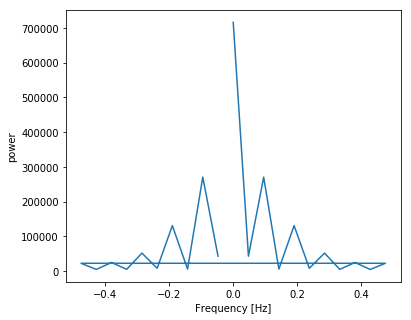

In [157]:
from scipy import stats
from scipy import fftpack

# Open file and load the matrix
mat = np.loadtxt('populations.txt')
year = mat[:,0]
hares = mat[:,1]
lynxes = mat[:,2]
carrots = mat[:,3]

# The FFT of the signal
hares_fft = fftpack.fft(hares)
lynxes_fft = fftpack.fft(lynxes)
carrots_fft = fftpack.fft(carrots)

# And the power (sig_fft is of complex dtype)
hares_power = np.abs(hares_fft)
lynxes_power = np.abs(lynxes_fft)
carrots_power = np.abs(carrots_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(hares_fft.size, d=1)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, hares_power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.